In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
rdf = pd.read_csv("data/owid-covid-data.csv")
rdf

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402727,ZWE,Africa,Zimbabwe,2024-05-15,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
402728,ZWE,Africa,Zimbabwe,2024-05-16,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
402729,ZWE,Africa,Zimbabwe,2024-05-17,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
402730,ZWE,Africa,Zimbabwe,2024-05-18,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [17]:
# 데이터 확인
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402732 entries, 0 to 402731
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402732 non-null  object 
 1   continent                                   383465 non-null  object 
 2   location                                    402732 non-null  object 
 3   date                                        402732 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         390667 non-null  float64
 

In [18]:
# 필요한 데이터만 가져오기
need_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']
ndf = rdf[need_columns]
ndf

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-01-05,NaN,41128772.0
1,AFG,Afghanistan,2020-01-06,NaN,41128772.0
2,AFG,Afghanistan,2020-01-07,NaN,41128772.0
3,AFG,Afghanistan,2020-01-08,NaN,41128772.0
4,AFG,Afghanistan,2020-01-09,NaN,41128772.0
...,...,...,...,...,...
402727,ZWE,Zimbabwe,2024-05-15,266362.0,16320539.0
402728,ZWE,Zimbabwe,2024-05-16,266362.0,16320539.0
402729,ZWE,Zimbabwe,2024-05-17,266362.0,16320539.0
402730,ZWE,Zimbabwe,2024-05-18,266362.0,16320539.0


In [19]:
# 나라이름 확인
ndf['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [20]:
# 한국 데이터 들고오기
rkdf = ndf[ndf.location == 'South Korea']
rkdf

,iso_code,location,date,total_cases,population
336276,KOR,South Korea,2020-01-05,NaN,51815808.0
336277,KOR,South Korea,2020-01-06,NaN,51815808.0
336278,KOR,South Korea,2020-01-07,NaN,51815808.0
336279,KOR,South Korea,2020-01-08,NaN,51815808.0
336280,KOR,South Korea,2020-01-09,NaN,51815808.0
...,...,...,...,...,...
337868,KOR,South Korea,2024-05-15,34571873.0,51815808.0
337869,KOR,South Korea,2024-05-16,34571873.0,51815808.0
337870,KOR,South Korea,2024-05-17,34571873.0,51815808.0
337871,KOR,South Korea,2024-05-18,34571873.0,51815808.0


In [21]:
# 프랑스 데이터 들고오기
rfdf = ndf[ndf.location == 'France']
rfdf

,iso_code,location,date,total_cases,population
121234,FRA,France,2020-01-05,NaN,67813000.0
121235,FRA,France,2020-01-06,NaN,67813000.0
121236,FRA,France,2020-01-07,NaN,67813000.0
121237,FRA,France,2020-01-08,NaN,67813000.0
121238,FRA,France,2020-01-09,NaN,67813000.0
...,...,...,...,...,...
122826,FRA,France,2024-05-15,38997490.0,67813000.0
122827,FRA,France,2024-05-16,38997490.0,67813000.0
122828,FRA,France,2024-05-17,38997490.0,67813000.0
122829,FRA,France,2024-05-18,38997490.0,67813000.0


In [22]:
# index를 날짜로
kdf = rkdf.set_index('date')
kdf

,iso_code,location,total_cases,population
date,,,,
2020-01-05,KOR,South Korea,NaN,51815808.0
2020-01-06,KOR,South Korea,NaN,51815808.0
2020-01-07,KOR,South Korea,NaN,51815808.0
2020-01-08,KOR,South Korea,NaN,51815808.0
2020-01-09,KOR,South Korea,NaN,51815808.0
...,...,...,...,...
2024-05-15,KOR,South Korea,34571873.0,51815808.0
2024-05-16,KOR,South Korea,34571873.0,51815808.0
2024-05-17,KOR,South Korea,34571873.0,51815808.0


In [23]:
# index를 날짜로
fdf = rfdf.set_index('date')
fdf

,iso_code,location,total_cases,population
date,,,,
2020-01-05,FRA,France,NaN,67813000.0
2020-01-06,FRA,France,NaN,67813000.0
2020-01-07,FRA,France,NaN,67813000.0
2020-01-08,FRA,France,NaN,67813000.0
2020-01-09,FRA,France,NaN,67813000.0
...,...,...,...,...
2024-05-15,FRA,France,38997490.0,67813000.0
2024-05-16,FRA,France,38997490.0,67813000.0
2024-05-17,FRA,France,38997490.0,67813000.0


In [24]:
# 각 나라의 확진자 확인
ktc = kdf['total_cases']
ftc = fdf['total_cases']

In [28]:
# 로우데이터 그래프용 데이터프레임
rgp = pd.DataFrame({
 'KOR': ktc,
 'FRA': ftc
 }, index=kdf.index
 )
rgp

,KOR,FRA
date,,
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
2020-01-09,NaN,NaN
...,...,...
2024-05-15,34571873.0,38997490.0
2024-05-16,34571873.0,38997490.0
2024-05-17,34571873.0,38997490.0


<Axes: xlabel='date'>

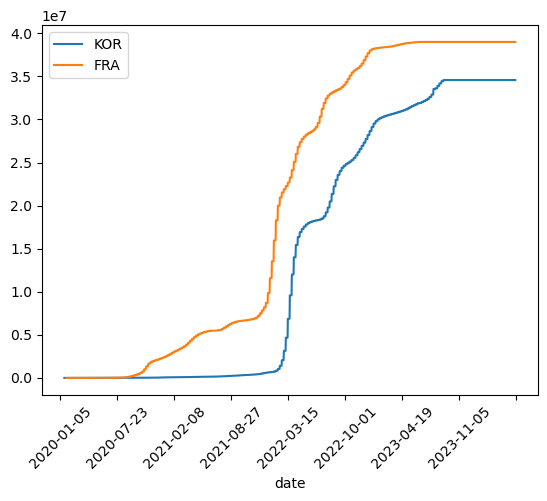

In [30]:
# 로우데이터 그래프 확인
rgp.plot.line(rot=45)

<Axes: xlabel='date'>

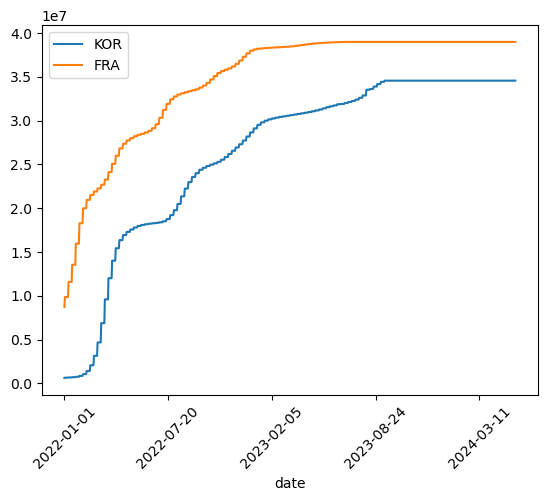

In [31]:
# 22년도부터 확인
rgp['2022-01-01':].plot.line(rot=45)

In [32]:
# 인구 확인
kp = kdf['population']['2022-01-01']
fp = fdf['population']['2022-01-01']

print('프랑스 인구(', fp, ')/ 대한민국 인구(', kp, ')')

프랑스 인구( 67813000.0 )/ 대한민국 인구( 51815808.0 )


In [33]:
# 인구 비율 구하기
# round(, 2)는 반올림, 2는 둘째 자리까지 표현
rate = round((fp / kp), 2)
rate

1.31

In [34]:
# 인구 비율을 생각한 그래프용 데이터 프레임
gp = pd.DataFrame({
 'KOR': ktc * rate,
 'FRA': ftc
 }, index=kdf.index
 )
gp

,KOR,FRA
date,,
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
2020-01-09,NaN,NaN
...,...,...
2024-05-15,45289153.63,38997490.0
2024-05-16,45289153.63,38997490.0
2024-05-17,45289153.63,38997490.0


<Axes: xlabel='date'>

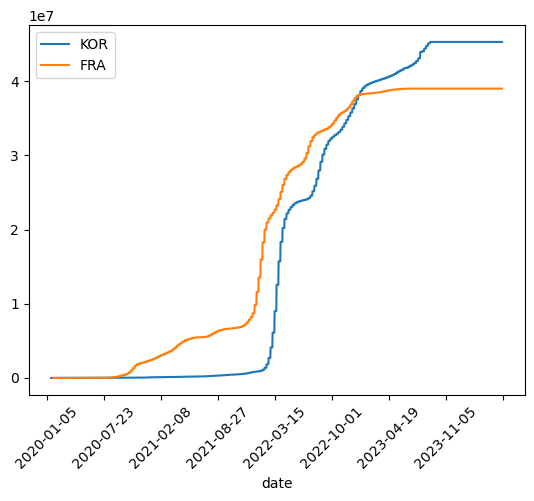

In [35]:
gp.plot.line(rot=45)

<Axes: xlabel='date'>

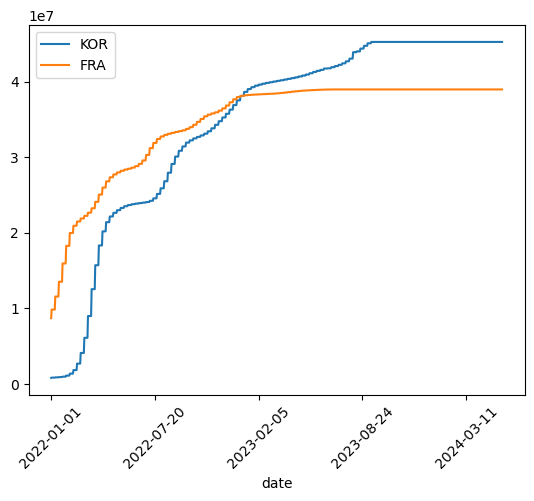

In [36]:
# 2022년 2월 초부터 급격히 상승세 : 오미크론 변이 바이러스 출현 때문
gp['2022-01-01':].plot.line(rot=45)

In [37]:
# 위에서 미국과 또다른 나라 2개를 추가 하여 그래프 그리기

In [38]:
# 미국 데이터 생성
udf = ndf[ndf.location == 'United States']

# 인덱스를 date로 변경
udf = udf.set_index('date')

# 확인
udf

,iso_code,location,total_cases,population
date,,,,
2020-01-05,USA,United States,NaN,338289856.0
2020-01-06,USA,United States,NaN,338289856.0
2020-01-07,USA,United States,NaN,338289856.0
2020-01-08,USA,United States,NaN,338289856.0
2020-01-09,USA,United States,NaN,338289856.0
...,...,...,...,...
2024-05-15,USA,United States,103436829.0,338289856.0
2024-05-16,USA,United States,103436829.0,338289856.0
2024-05-17,USA,United States,103436829.0,338289856.0


In [44]:
# Australia 데이터 생성
adf = ndf[ndf.location == 'Australia']

# 인덱스를 date로 변경
adf = adf.set_index('date')

# 확인
adf

,iso_code,location,total_cases,population
date,,,,
2020-01-05,AUS,Australia,NaN,26177410.0
2020-01-06,AUS,Australia,NaN,26177410.0
2020-01-07,AUS,Australia,NaN,26177410.0
2020-01-08,AUS,Australia,NaN,26177410.0
2020-01-09,AUS,Australia,NaN,26177410.0
...,...,...,...,...
2024-05-15,AUS,Australia,11853158.0,26177410.0
2024-05-16,AUS,Australia,11853158.0,26177410.0
2024-05-17,AUS,Australia,11853158.0,26177410.0


In [45]:
# Ecuador 데이터 생성
edf = ndf[ndf.location == 'Ecuador']

# 인덱스를 date로 변경
edf = edf.set_index('date')

# 확인
edf

,iso_code,location,total_cases,population
date,,,,
2020-01-05,ECU,Ecuador,NaN,18001002.0
2020-01-06,ECU,Ecuador,NaN,18001002.0
2020-01-07,ECU,Ecuador,NaN,18001002.0
2020-01-08,ECU,Ecuador,NaN,18001002.0
2020-01-09,ECU,Ecuador,NaN,18001002.0
...,...,...,...,...
2024-05-15,ECU,Ecuador,1076139.0,18001002.0
2024-05-16,ECU,Ecuador,1076139.0,18001002.0
2024-05-17,ECU,Ecuador,1076139.0,18001002.0


In [46]:
# Brazil 데이터 생성
bdf = ndf[ndf.location == 'Brazil']

# 인덱스를 date로 변경
bdf = bdf.set_index('date')

# 확인
bdf

,iso_code,location,total_cases,population
date,,,,
2020-01-05,BRA,Brazil,NaN,215313504.0
2020-01-06,BRA,Brazil,NaN,215313504.0
2020-01-07,BRA,Brazil,NaN,215313504.0
2020-01-08,BRA,Brazil,NaN,215313504.0
2020-01-09,BRA,Brazil,NaN,215313504.0
...,...,...,...,...
2024-05-15,BRA,Brazil,37519960.0,215313504.0
2024-05-16,BRA,Brazil,37519960.0,215313504.0
2024-05-17,BRA,Brazil,37519960.0,215313504.0


In [47]:
# 확찐자들 확인
utc = udf['total_cases']
atc = adf['total_cases']
etc = edf['total_cases']
btc = bdf['total_cases']

In [49]:
# 인구 기준을 미국으로 잡겠음. 미국 인구가 젤 많을거니까
kp = kdf['population']['2022-01-01']
up = udf['population']['2022-01-01']
fp = fdf['population']['2022-01-01']
ap = adf['population']['2022-01-01']
ep = edf['population']['2022-01-01']
bp = bdf['population']['2022-01-01']

print('미국 인구(', up, ')/ 대한민국 인구(', kp, ')')
print('미국 인구(', up, ')/ 프랑스 인구(', fp, ')')
print('미국 인구(', up, ')/ 호주 인구(', ap, ')')
print('미국 인구(', up, ')/ 에콰도르 인구(', ep, ')')
print('미국 인구(', up, ')/ 브라질 인구(', bp, ')')

미국 인구( 338289856.0 )/ 대한민국 인구( 51815808.0 )
미국 인구( 338289856.0 )/ 프랑스 인구( 67813000.0 )
미국 인구( 338289856.0 )/ 호주 인구( 26177410.0 )
미국 인구( 338289856.0 )/ 에콰도르 인구( 18001002.0 )
미국 인구( 338289856.0 )/ 브라질 인구( 215313504.0 )


In [51]:
# 인구 비율 구하기
# round(, 2)는 반올림, 2는 둘째 자리까지 표현
krate = round((up / kp), 2)
frate = round((up / fp), 2)
arate = round((up / ap), 2)
erate = round((up / ep), 2)
brate = round((up / bp), 2)

In [53]:
# 확진자 비율을 적용한 최종 데이터프레임 생성하기
gp = pd.DataFrame({
    'USA': utc,
    'KOR': ktc * krate, # 비율 반영
    'FRA': ftc * frate,
    'AUS': atc * arate,
    'ECU': etc * erate,
    'BRA': btc * brate
    }, index=kdf.index
)

gp

,USA,KOR,FRA,AUS,ECU,BRA
date,,,,,,
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-05-15,103436829.0,2.257543e+08,194597475.1,1.531428e+08,20220651.81,58906337.2
2024-05-16,103436829.0,2.257543e+08,194597475.1,1.531428e+08,20220651.81,58906337.2
2024-05-17,103436829.0,2.257543e+08,194597475.1,1.531428e+08,20220651.81,58906337.2


<Axes: xlabel='date'>

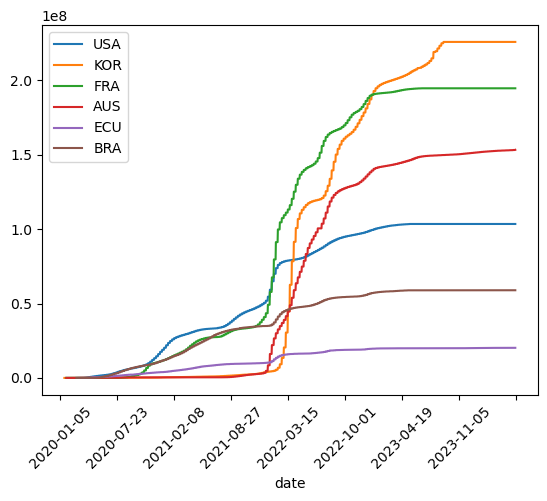

In [54]:
gp.plot.line(rot=45)

<Axes: xlabel='date'>

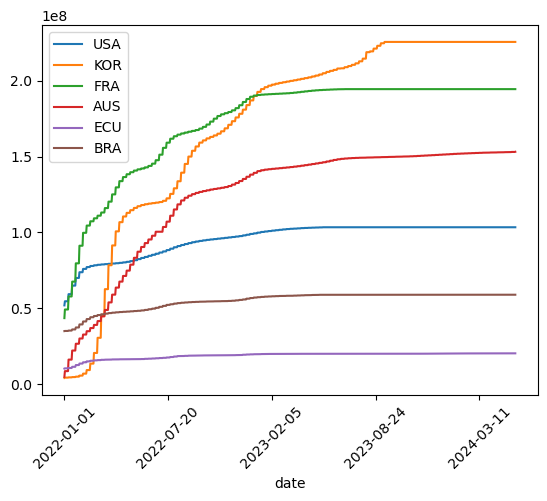

In [55]:
gp['2022-01-01':].plot.line(rot=45)

In [56]:
# 한국 놈들이 별나다 ㅋㅋㅋ